In [48]:
#data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('/content/Salary.csv')

In [50]:
#read data
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [51]:
#check duplicates
df.duplicated().sum()

1536

In [52]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [53]:
#check for missing value
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0
Country,0
Race,0
Senior,0


In [54]:
#handle outliers
from scipy import stats
z = np.abs(stats.zscore(df['Salary']))

In [55]:
#handle outliers
z = np.abs(stats.zscore(df['Salary']))
threshold = 3
print(np.where(z > 3))
df_o = df[(z < 3)]

(array([], dtype=int64),)


In [56]:
#check for data inconsistencies
print(df.dtypes)

Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object


In [57]:
# Experience Level:Derive categories like "Junior," "Mid-level," and "Senior" based on Years of Experience.
df['Experience Level'] = df['Years of Experience'].apply(lambda x: 'Junior' if x < 5 else ('Mid-level' if x < 15 else 'Senior'))

In [58]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Experience Level
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0,Mid-level
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,Junior
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1,Senior
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0,Mid-level
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0,Senior
...,...,...,...,...,...,...,...,...,...,...
6678,37.0,Male,1,Sales Representative,6.0,75000.0,Canada,Asian,0,Mid-level
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0,Senior
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0,Junior
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0,Junior


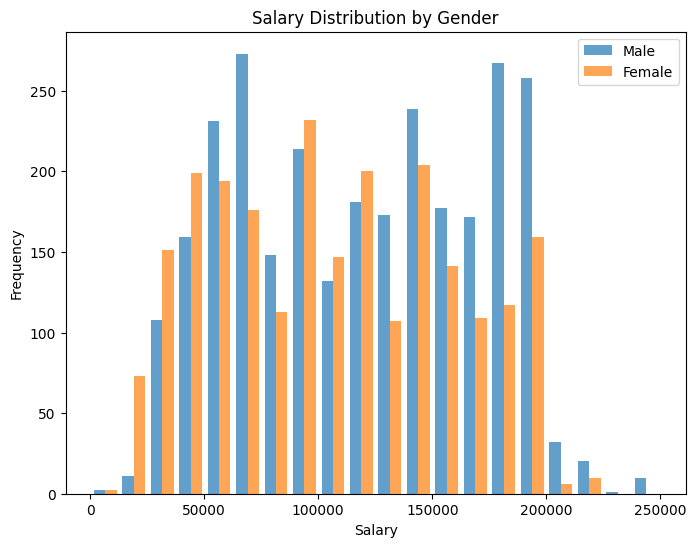

In [59]:
# Assuming your data is in a pandas DataFrame called 'df'
plt.figure(figsize=(8, 6))
plt.hist([df[df['Gender'] == 'Male']['Salary'], df[df['Gender'] == 'Female']['Salary']], bins=20, label=['Male', 'Female'], alpha=0.7)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution by Gender')
_ = plt.legend()

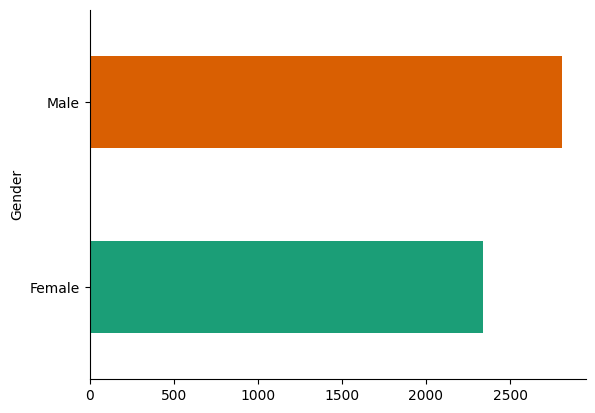

In [60]:
#Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

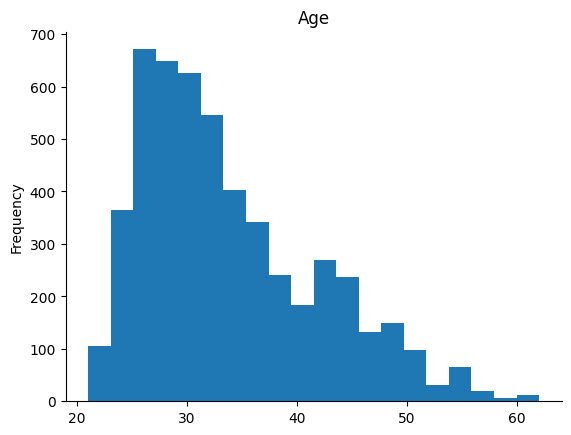

In [61]:
#Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

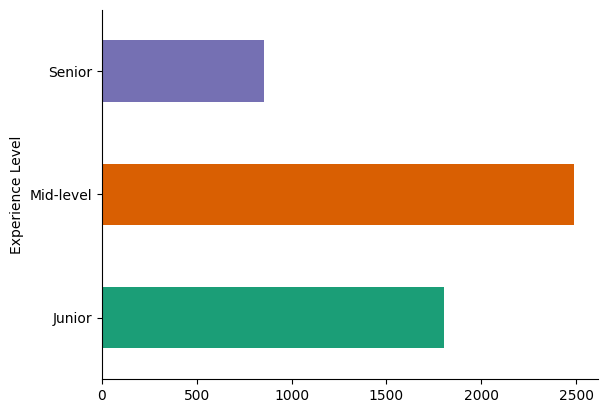

In [62]:
#Experience Level

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Experience Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

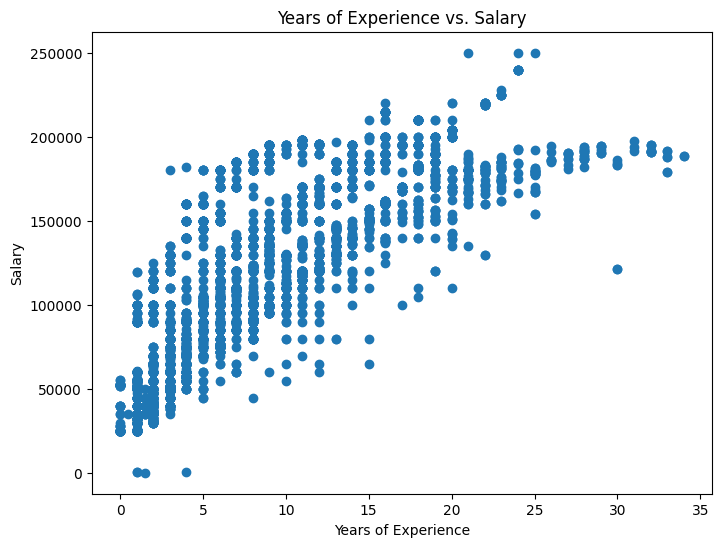

In [63]:
#Scatter Plot: Years of Experience vs. Salary
plt.figure(figsize=(8, 6))
plt.scatter(df['Years of Experience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')
plt.show()

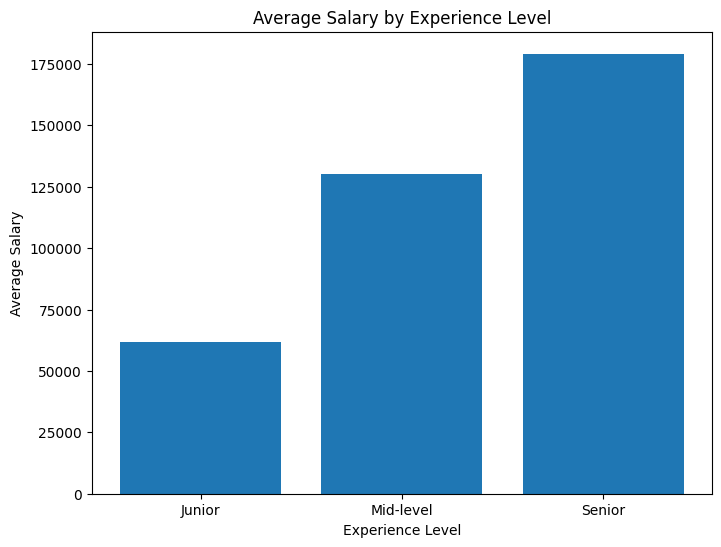

In [64]:
#Average Salary by Experience Level
average_salary_by_level = df.groupby('Experience Level')['Salary'].mean()
plt.figure(figsize=(8, 6))
plt.bar(average_salary_by_level.index, average_salary_by_level.values)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Experience Level')
plt.show()

In [74]:
# Save the modified dataset
df.to_csv('modified_dataset.csv', index=False)

In [66]:
df['index'] = df.index + 1

In [67]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Experience Level,index
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0,Mid-level,1
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,Junior,2
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1,Senior,3
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0,Mid-level,4
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0,Senior,5
...,...,...,...,...,...,...,...,...,...,...,...
6678,37.0,Male,1,Sales Representative,6.0,75000.0,Canada,Asian,0,Mid-level,6679
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0,Senior,6680
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0,Junior,6681
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0,Junior,6682


In [69]:
# Define a function to categorize the age into groups
def categorize_age(Age):
    if 20 <= Age <= 30:
        return "20-30"
    elif 31 <= Age <= 40:
        return "31-40"
    elif 41 <= Age <= 50:
        return "41-50"
    elif 51 <= Age <= 62:
        return "51-62"
    else:
        return "Other"

# Apply the function to create the 'age_group' column
df['age_group'] = df['Age'].apply(categorize_age)

In [70]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Experience Level,index,age_group
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0,Mid-level,1,31-40
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,Junior,2,20-30
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1,Senior,3,41-50
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0,Mid-level,4,31-40
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0,Senior,5,51-62
...,...,...,...,...,...,...,...,...,...,...,...,...
6678,37.0,Male,1,Sales Representative,6.0,75000.0,Canada,Asian,0,Mid-level,6679,31-40
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0,Senior,6680,41-50
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0,Junior,6681,31-40
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0,Junior,6682,20-30


In [73]:
import random

# Add random year column (between 2019 and 2024)
df['year'] = [random.randint(2019, 2024) for _ in range(len(df))]
